In [19]:
%matplotlib notebook

In [25]:
import serial
from matplotlib import pyplot as plt
import numpy as np
from time import time

In [26]:
ser = serial.Serial('COM3', 9600)

In [44]:
if ser.is_open:
    ser.close()
    
ser.open()

<IPython.core.display.Javascript object>


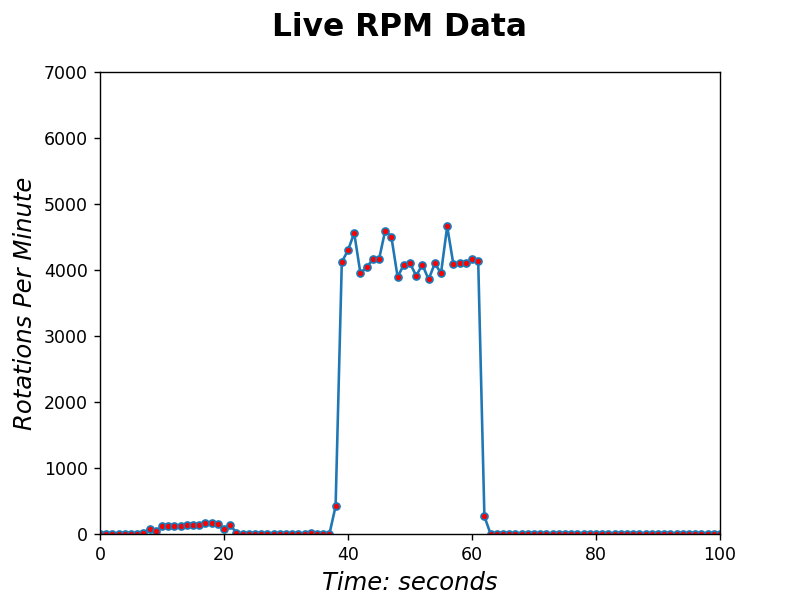

<IPython.core.display.Javascript object>


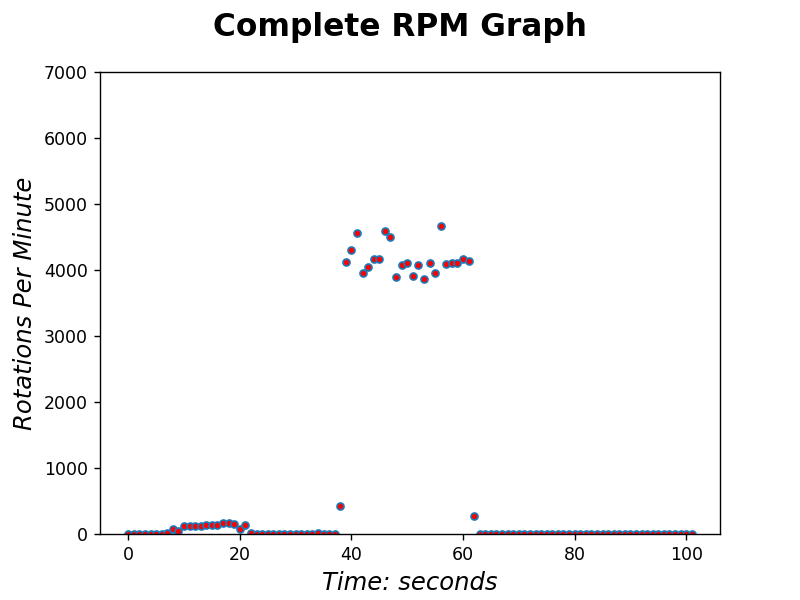

In [45]:
# set plot to animated
plt.ion() 

timepoints = []
ydata = []
yrange = [-0.1,7000]
view_time = 100 # seconds of data to view at once
duration = 100 # total seconds to collect data

fig1 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig1.suptitle('Live RPM Data', fontsize='18', fontweight='bold')
plt.xlabel('Time: seconds', fontsize='14', fontstyle='italic')
plt.ylabel('Rotations Per Minute', fontsize='14', fontstyle='italic')
#plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=4,linestyle='-',markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])

# flush any junk left in the serial buffer
ser.flushInput()
# ser.reset_input_buffer() # for pyserial 3.0+
run = True
count = 0
# collect the data and plot a moving frame
while run:
    ser.reset_input_buffer()
    data = ser.readline()
    #b'20, 73.40\r\n' is the format, time, fahrenheit temp
    
    try: #just in case the data format is messy
        # store the entire dataset for later
        ydata.append(int(str(data).split("\\")[0].split("'")[1]))
        timepoints.append(count)
 
        # update the plotted data
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        count += 1
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    
    # update the plot
    fig1.canvas.draw()
    
# plot all of the data you collected
fig2 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig2.suptitle('Complete RPM Graph', fontsize='18', fontweight='bold')
plt.xlabel('Time: seconds', fontsize='14', fontstyle='italic')
plt.ylabel('Rotations Per Minute', fontsize='14', fontstyle='italic')
#plt.axes().grid(True)

plt.plot(timepoints, ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
fig2.show()

ser.close()

In [46]:
with open("rpm_data.csv", "w") as f :
    for i in range(len(timepoints)) :
        f.write(str(timepoints[i]) + "," + str(ydata[i]) + "\n");